In [29]:
%matplotlib inline
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

In [3]:
# clear_cache('cython')

In [8]:
def FitzhughNagumo(I, epsilon, duration):

    eqs = ''' 
        du/dt = (u*(1-(u/mV)**2) - w + I*Mohm)*(1/ms) : volt
        dw/dt = (epsilon/ms)*(u - 0.5*w + 1*mV) : volt 
    '''

    neuron = NeuronGroup(1, eqs, method=euler)
    neuron.u = 0
    neuron.w = 0

    statemon = StateMonitor(neuron, ["u","w"], record=True)

    fn_net = Network(neuron)
    fn_net.add(statemon)
    fn_net.run(duration)

    return statemon

# 6.1. Exercise: Phase plane analysis

In [9]:
statemon = FitzhughNagumo(0*namp, 0.1, 500*ms)

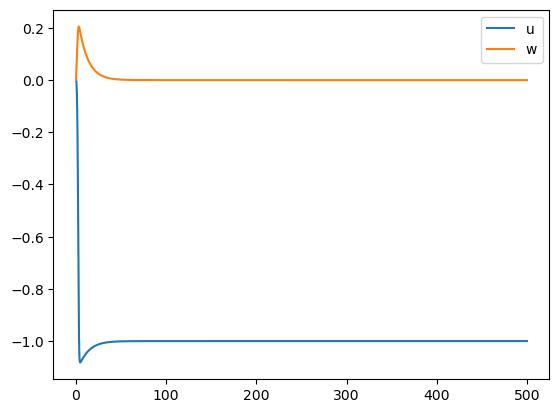

In [12]:
plt.plot(statemon.t/ms, statemon.u[0]/mV, label="u")
plt.plot(statemon.t/ms, statemon.w[0]/mV, label="w")
plt.legend();

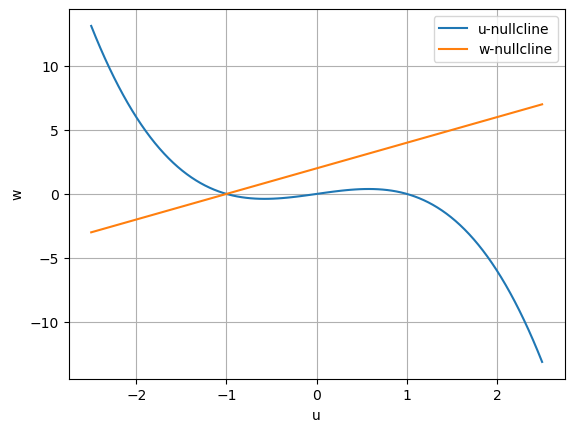

In [36]:
### Plotting nullclines

u = np.linspace(-2.5, 2.5, 100)
plt.plot(u, u*(1-u**2),label="u-nullcline")
plt.plot(u, 2*(u+1),label="w-nullcline")
plt.xlabel("u")
plt.ylabel("w")
plt.legend();
plt.grid();


WARNING    'u' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value array([-2.5       , -2.44949495, -2.3989899 , ...,  2.3989899 ,
        2.44949495,  2.5       ]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


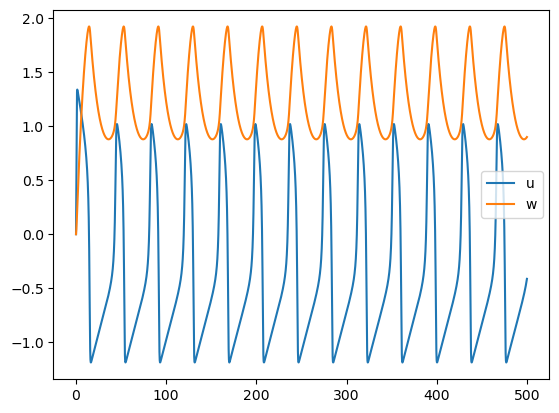

In [18]:
statemon = FitzhughNagumo(1.3*namp, 0.1, 500*ms)
plt.plot(statemon.t/ms, statemon.u[0]/mV, label="u")
plt.plot(statemon.t/ms, statemon.w[0]/mV, label="w")
plt.legend();

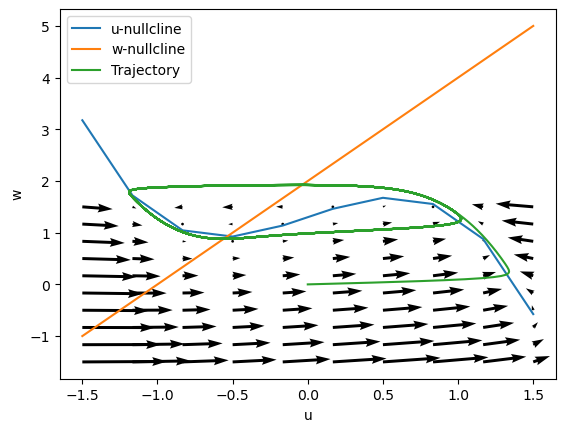

In [26]:
### Plotting nullclines

uu = np.linspace(-1.5, 1.5, 10)
ww = np.linspace(-1.5, 1.5, 10)

UU, WW = np.meshgrid(uu, ww)

plt.plot(uu, uu*(1-uu**2) + 1.3, label="u-nullcline")
plt.plot(uu, 2*(uu+1), label="w-nullcline")
plt.plot(statemon.u[0]/mV, statemon.w[0]/mV, label="Trajectory")
plt.quiver(UU, WW, UU*(1-UU**2) - WW + 1.3, 0.1*(UU + 1 - 0.5*WW))
plt.xlabel("u")
plt.ylabel("w")
plt.legend();

### Fixed point : du/dt = 0 and dw/dt = 0 gives us u - u^3 - w + I = 0 and u + 1 - 0.5*w = 0. Substituting the second in first gives -> u - u^3 - 2*(u+1) + I = 0, or u^3 + u + 2 - I = 0. Solve the cubic to get root, then substitute back to get w. 

In [62]:
def u_root(u, I):
    return u**3 + u + 2 - I 

u0 = brentq(u_root, -2, 2, args=(0))        
w0 = 2*(u0 + 1)

u0, w0

(-1.0, 0.0)

In [63]:
def FN_get_jacobian(eps, u0):
    return [[1-3*u0**2, -1], [eps, -0.5*eps]]

In [64]:
J = FN_get_jacobian(0.1, u0)
J

[[-2.0, -1], [0.1, -0.05]]

In [65]:
np.linalg.eigvals(J)

array([-1.94729334, -0.10270666])

In [71]:
eigvals = np.zeros((40, 2))

for indx, I in enumerate([0.1*i for i in range(40)]):
    u0 = brentq(u_root, -2, 2, args=(I)) 
    J = FN_get_jacobian(0.1, u0)
    e = np.linalg.eigvals(J)
    eigvals[indx] = [e[0].real, e[1].real]

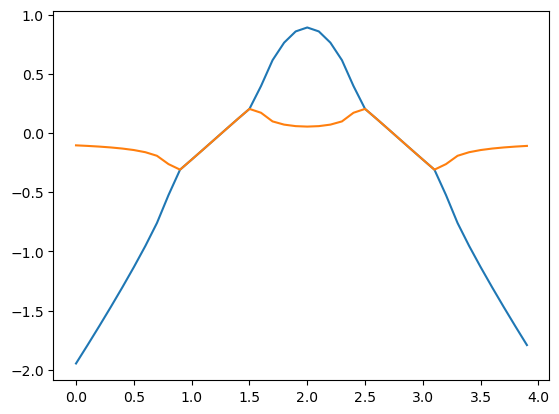

In [73]:
plt.plot([0.1*i for i in range(40)], eigvals);